In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score, average_precision_score
from random import randint
import duckdb as dk
import matplotlib.cm as cm
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, OPTICS, AffinityPropagation
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import SparsePCA, PCA, TruncatedSVD
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import umap
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier

input = pd.read_parquet("songs.parquet")
input

/home/cody-barriger/github-repos/Toy-Social-Media-Dataset-Analysis/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Unnamed: 0.1,Unnamed: 0,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms_x,album_name,...,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,artist_pop,genres,track_pop
0,0,0,0,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
1,1,7734,73,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
2,2,14037,14,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
3,3,21536,42,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
4,4,24404,1,Missy Elliott,0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,...,audio_features,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,226864,4,74,dance_pop hip_hop hip_pop pop pop_rap r&b rap ...,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67494,67494,67496,37,Jon D,3uCHI1gfOUL5j5swEh0TcH,spotify:artist:5HCypjplgh5uQezvBpOfXN,I Don't Know,spotify:album:2KEQtuVl1cYsTYtVRUrNVi,189183,Roots,...,audio_features,3uCHI1gfOUL5j5swEh0TcH,spotify:track:3uCHI1gfOUL5j5swEh0TcH,https://api.spotify.com/v1/tracks/3uCHI1gfOUL5...,https://api.spotify.com/v1/audio-analysis/3uCH...,189184,4,47,unknown,27
67495,67495,67499,40,Big Words,0P1oO2gREMYUCoOkzYAyFu,spotify:artist:0sHN89qak07mnug3LVVjzP,The Answer,spotify:album:5jrsRHRAmetu5e7RRBoxj7,263679,"Hollywood, a Beautiful Coincidence",...,audio_features,0P1oO2gREMYUCoOkzYAyFu,spotify:track:0P1oO2gREMYUCoOkzYAyFu,https://api.spotify.com/v1/tracks/0P1oO2gREMYU...,https://api.spotify.com/v1/audio-analysis/0P1o...,263680,4,39,australian_r&b,37
67496,67496,67500,41,Allan Rayman,2oM4BuruDnEvk59IvIXCwn,spotify:artist:6Yv6OBXD6ZQakEljaGaDAk,25.22,spotify:album:3CbNgBzI7r9o0F6VjH9sTY,189213,Roadhouse 01,...,audio_features,2oM4BuruDnEvk59IvIXCwn,spotify:track:2oM4BuruDnEvk59IvIXCwn,https://api.spotify.com/v1/tracks/2oM4BuruDnEv...,https://api.spotify.com/v1/audio-analysis/2oM4...,189213,4,55,canadian_contemporary_r&b modern_alternative_rock,49
67497,67497,67501,42,Jon Jason,4Ri5TTUgjM96tbQZd5Ua7V,spotify:artist:77bNdkKYBBmc30CisCA6tE,Good Feeling,spotify:album:2dZ7oVNQBeLlpoUYfbEsJP,194720,Good Feeling,...,audio_features,4Ri5TTUgjM96tbQZd5Ua7V,spotify:track:4Ri5TTUgjM96tbQZd5Ua7V,https://api.spotify.com/v1/tracks/4Ri5TTUgjM96...,https://api.spotify.com/v1/audio-analysis/4Ri5...,194720,4,4,unknown,16


In [2]:
data2 = input[['id', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genres']].drop_duplicates()


In [4]:
genres = data2['genres'].str.split(" ")
unzipped=[]
for gen in genres:
    for g in gen:
        
        
        unzipped.append(g)
genr = pd.DataFrame(unzipped)
counts = genr[0].value_counts()
print(counts.head(25))
print(counts.index.to_list())
glist = counts.index.to_list()
glist = glist[:50]
print(glist)

0
pop                     4798
dance_pop               3855
rap                     3666
pop_rap                 3358
rock                    3334
hip_hop                 3068
pop_rock                2237
modern_rock             2169
trap                    2100
unknown                 2051
southern_hip_hop        1826
country                 1722
contemporary_country    1721
r&b                     1699
country_road            1613
urban_contemporary      1529
post-teen_pop           1474
electropop              1341
edm                     1270
neo_mellow              1192
classic_rock            1191
gangster_rap            1181
stomp_and_holler        1138
indie_rock              1123
alternative_rock        1101
Name: count, dtype: int64
['pop', 'dance_pop', 'rap', 'pop_rap', 'rock', 'hip_hop', 'pop_rock', 'modern_rock', 'trap', 'unknown', 'southern_hip_hop', 'country', 'contemporary_country', 'r&b', 'country_road', 'urban_contemporary', 'post-teen_pop', 'electropop', 'edm', 'neo_

In [ ]:
data2 = input[['id', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'genres']].drop_duplicates()
for g in glist:
    print(g, ':')
    data2['class'] = [1 if x else 0 for x in data2['genres'].str.contains(g)]

    data = data2.drop(['id', 'genres', 'class'], axis=1)
    x = data
    y = data2['class']
    oversampler = RandomUnderSampler()
    xover, yover = oversampler.fit_resample(x, y)
    Xtrain, Xtest, ytrain, ytest = train_test_split(xover, yover)

    rfc = RandomForestClassifier()
    rfc.fit(Xtrain, ytrain)


    
    # Calculating the AUC score explicitly
    y_pred_proba = rfc.predict_proba(Xtest)[:, 1] # Probability of the positive class
    auc_score = roc_auc_score(ytest, y_pred_proba)
    pr_score = average_precision_score(ytest, y_pred_proba)
    print(f"AUC Score: {auc_score:.4f}")




pop :
AUC Score: 0.6598
dance_pop :
AUC Score: 0.7451
rap :
AUC Score: 0.8971
pop_rap :
AUC Score: 0.8807
rock :
AUC Score: 0.7933
hip_hop :
AUC Score: 0.8922
pop_rock :
AUC Score: 0.7114
modern_rock :
AUC Score: 0.7622
trap :
AUC Score: 0.8851
unknown :
AUC Score: 0.5822
southern_hip_hop :
AUC Score: 0.9261
country :
AUC Score: 0.8457
contemporary_country :
AUC Score: 0.8945
r&b :
AUC Score: 0.8184
country_road :
AUC Score: 0.8883
urban_contemporary :
AUC Score: 0.7707
post-teen_pop :
AUC Score: 0.7981
electropop :
AUC Score: 0.7469
edm :
AUC Score: 0.8688
neo_mellow :
AUC Score: 0.7754
classic_rock :
AUC Score: 0.8515
gangster_rap :
AUC Score: 0.9310
stomp_and_holler :
AUC Score: 0.8064
indie_rock :
AUC Score: 0.7867
alternative_rock :
AUC Score: 0.7799
indie_pop :
AUC Score: 0.6903
alternative_metal :
AUC Score: 0.8843
permanent_wave :
AUC Score: 0.7431
mellow_gold :
AUC Score: 0.8739
pop_dance :
AUC Score: 0.8832
indie_poptimism :
AUC Score: 0.7222
hip_pop :
AUC Score: 0.8024
indie

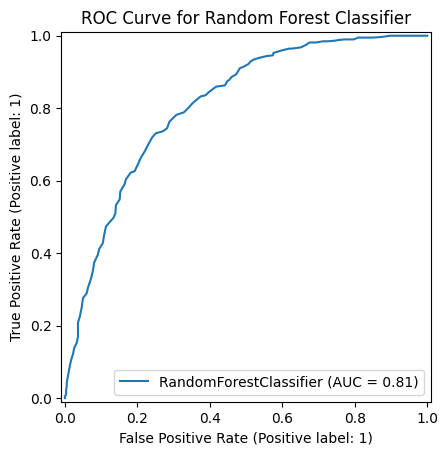

AUC Score: 0.8091


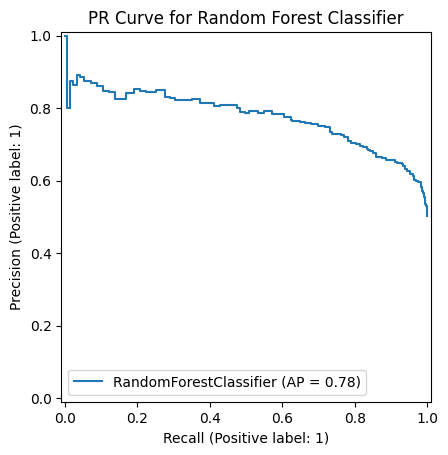

In [46]:
rfc = RandomForestClassifier()
rfc.fit(Xtrain, ytrain)

roc_display = RocCurveDisplay.from_estimator(rfc, Xtest, ytest)
plt.title("ROC Curve for Random Forest Classifier")
plt.show()

    # Calculating the AUC score explicitly
y_pred_proba = rfc.predict_proba(Xtest)[:, 1] # Probability of the positive class
auc_score = roc_auc_score(ytest, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

pr_display = PrecisionRecallDisplay.from_estimator(rfc, Xtest, ytest)
plt.title("PR Curve for Random Forest Classifier")
plt.show()

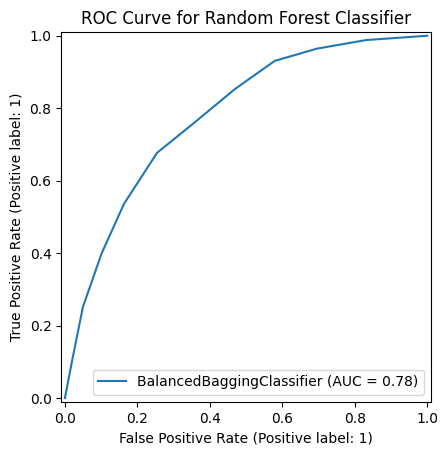

AUC Score: 0.7801


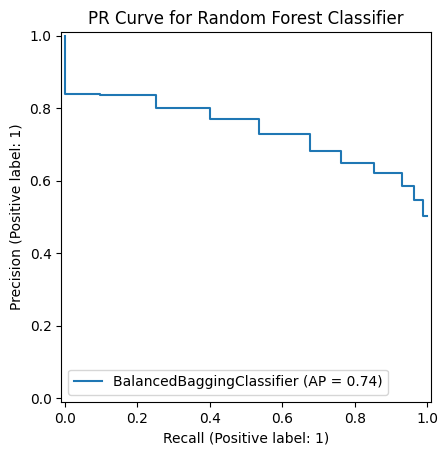

In [47]:


rfc = BalancedBaggingClassifier()
rfc.fit(Xtrain, ytrain)

roc_display = RocCurveDisplay.from_estimator(rfc, Xtest, ytest)
plt.title("ROC Curve for Random Forest Classifier")
plt.show()

    # Calculating the AUC score explicitly
y_pred_proba = rfc.predict_proba(Xtest)[:, 1] # Probability of the positive class
auc_score = roc_auc_score(ytest, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

pr_display = PrecisionRecallDisplay.from_estimator(rfc, Xtest, ytest)
plt.title("PR Curve for Random Forest Classifier")
plt.show()

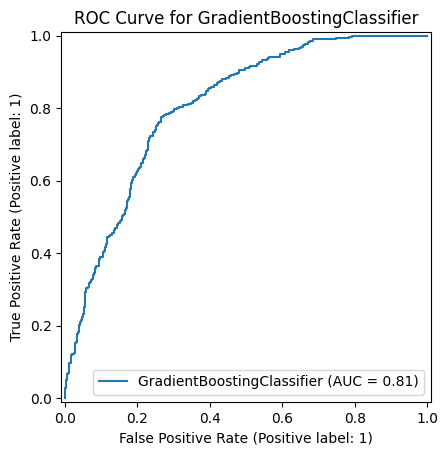

AUC Score: 0.8055


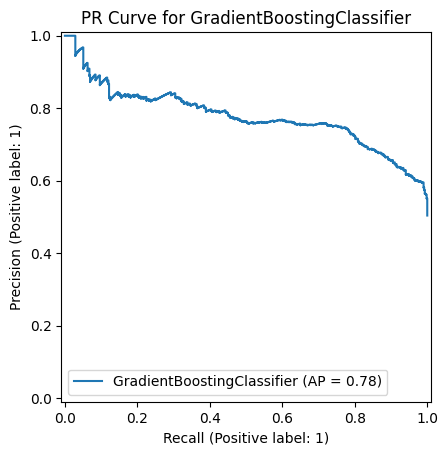

In [48]:
rfc = GradientBoostingClassifier()
rfc.fit(Xtrain, ytrain)

roc_display = RocCurveDisplay.from_estimator(rfc, Xtest, ytest)
plt.title("ROC Curve for GradientBoostingClassifier")
plt.show()

    # Calculating the AUC score explicitly
y_pred_proba = rfc.predict_proba(Xtest)[:, 1] # Probability of the positive class
auc_score = roc_auc_score(ytest, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

pr_display = PrecisionRecallDisplay.from_estimator(rfc, Xtest, ytest)
plt.title("PR Curve for GradientBoostingClassifier")
plt.show()
